In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten

2024-10-21 08:06:07.683100: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file = h5py.File('bpe_xy.h5', 'r')

x = file['x'][:].astype(np.uint8)
y = file['y'][:].astype(np.uint8)

x.shape, y.shape, len(np.unique(x)), len(np.unique(y))

((50000, 13704), (50000, 13704), 208, 29)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40000, 13704), (40000, 13704), (10000, 13704), (10000, 13704))

In [4]:
model = Sequential([
    Input(shape=(13704,)),
    Embedding(input_dim=209, output_dim=4),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(13704, activation='relu')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13704, 4)          836       
                                                                 
 flatten (Flatten)           (None, 54816)             0         
                                                                 
 dense (Dense)               (None, 32)                1754144   
                                                                 
 dense_1 (Dense)             (None, 13704)             452232    
                                                                 
Total params: 2207212 (8.42 MB)
Trainable params: 2207212 (8.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
optimizer = Adam(learning_rate=.001)
model.compile(optimizer=optimizer, loss='mae', metrics=['mse'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=32, batch_size=8192)

Epoch 1/32
5/5 [==============================] - 27s 5s/step - loss: 6.8993 - mse: 489.6584 - val_loss: 6.6447 - val_mse: 489.0113
Epoch 2/32
5/5 [==============================] - 23s 5s/step - loss: 6.5845 - mse: 480.9377 - val_loss: 6.4943 - val_mse: 482.9215
Epoch 3/32
5/5 [==============================] - 25s 5s/step - loss: 6.4673 - mse: 478.2107 - val_loss: 6.4727 - val_mse: 478.6057
Epoch 4/32
5/5 [==============================] - 25s 5s/step - loss: 6.4042 - mse: 471.1396 - val_loss: 6.3993 - val_mse: 472.7907
Epoch 5/32
5/5 [==============================] - 24s 5s/step - loss: 6.3376 - mse: 467.0956 - val_loss: 6.3472 - val_mse: 465.6643
Epoch 6/32
5/5 [==============================] - 24s 5s/step - loss: 6.2856 - mse: 458.5424 - val_loss: 6.3132 - val_mse: 459.1088
Epoch 7/32
5/5 [==============================] - 24s 5s/step - loss: 6.2379 - mse: 450.4354 - val_loss: 6.2585 - val_mse: 448.3672
Epoch 8/32
5/5 [==============================] - 25s 5s/step - loss: 6.1824

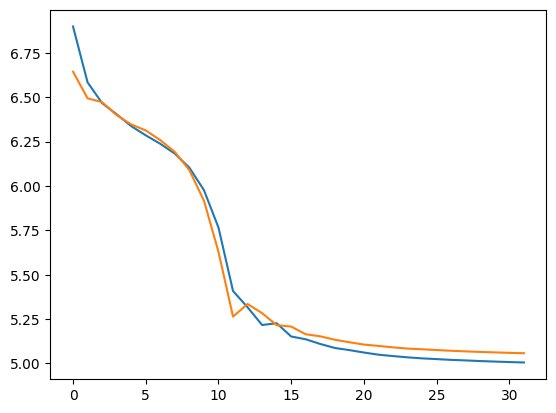

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()

In [8]:
test = x[0].reshape(1,-1)
test

array([[60, 84, 87, ...,  1,  1,  1]], dtype=uint8)

In [9]:
model.predict(test)

1/1 [==============================] - 0s 206ms/step


array([[76.44854   ,  0.        ,  0.        , ...,  1.0062346 ,
         0.        ,  0.87625504]], dtype=float32)

In [10]:
y[0]

array([92, 84, 87, ...,  1,  1,  1], dtype=uint8)